# Project Title

Netflix Data: Cleaning, Analysis and Visualization

Internship Project by Kiran Singh

# Introduction / Objective

# Introduction 

Netflix is one of the largest streaming platforms in the world, offering a wide variety of TV shows, movies, documentaries, and more. Understanding the nature of its content, such as popular genres, top-rated shows, and the distribution across countries and time, can provide insights into viewer preferences and market strategy.

# Objective

The main objective of this project is to perform data analysis on the Netflix dataset to uncover:
- Content trends over the years
- Distribution of content by type (Movies vs. TV Shows)
- Top contributing directors and countries
- Most frequent genres
- Insights about release years and ratings
- Missing data handling and data cleaning

#  Dataset Description

The dataset used in this analysis was collected from Netflix and contains information about its titles. It includes the following columns:

- **show_id**: Unique ID of the show
- **type**: Type of content (Movie or TV Show)
- **title**: Title of the content
- **director**: Director of the content
- **country**: Country of production
- **date_added**: Date content was added to Netflix
- **release_year**: Year the content was released
- **rating**: Age rating (TV-MA, PG, etc.)
- **duration**: Length of the movie or number of seasons
- **listed_in**: Genre/category of the content

#  Import Libraries

In [67]:
import warnings
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#  Load Data

In [5]:
df = pd.read_csv("netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# Data Info

In [13]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8596 entries, 0 to 8595
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8596 non-null   object
 1   type          8596 non-null   object
 2   title         8596 non-null   object
 3   director      8596 non-null   object
 4   country       8596 non-null   object
 5   date_added    8596 non-null   object
 6   release_year  8596 non-null   int64 
 7   rating        8596 non-null   object
 8   duration      8595 non-null   object
 9   listed_in     8595 non-null   object
dtypes: int64(1), object(9)
memory usage: 671.7+ KB


(8596, 10)

In [17]:
df.columns
for column in df.columns:
    print(column)

show_id
type
title
director
country
date_added
release_year
rating
duration
listed_in


In [19]:
df.describe()

,release_year
count,8596.000000
mean,2014.239530
std,8.829375
min,1925.000000
25%,2013.750000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        1
listed_in       1
dtype: int64

# Data Cleaning & Preprocessing

In [258]:
df.dropna(subset=['listed_in', 'director'], inplace=True)

In [31]:
df['show_id'].dtype

dtype('O')

In [27]:
df['show_id'].is_unique

True

In [41]:
df['show_id'].duplicated().sum()

0

# Create year_added and month_added columns

In [ ]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# extracts the day of the month from the date_added column.

In [154]:
df['day_added'] = df['date_added'].dt.day

In [160]:
df['dayofweek_added'] = df['date_added'].dt.dayofweek

In [162]:
df['is_weekend'] = df['dayofweek_added'].isin([5, 6]).astype(int)

In [164]:
from datetime import datetime
today = pd.to_datetime('today')
df['days_since_added'] = (today - df['date_added']).dt.days

In [166]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month

In [170]:
df.columns
for column in df.columns:
    print(column)

show_id
type
title
director
country
date_added
release_year
rating
duration
listed_in
title_length
title_word_count
year_added
month_added
day_added
dayofweek_added
is_weekend
days_since_added


## Exploratory Data Analysis(EDA)


EDA for type column

In [33]:
df['type'].dtype

dtype('O')

In [35]:
df['type'].value_counts()

type
Movie      6111
TV Show    2484
Name: count, dtype: int64

# Check For Frequency Count

 To Understand the Data Distribution

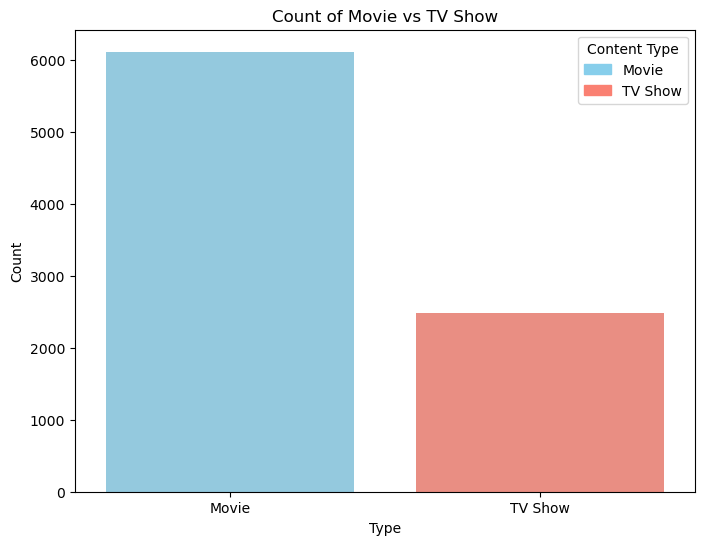

In [69]:
custom_palette = {'Movie': 'skyblue', 'TV Show': 'salmon'}

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type', palette=custom_palette)

plt.title('Count of Movie vs TV Show')
plt.xlabel('Type')
plt.ylabel('Count')

from matplotlib.patches import Patch
legend_labels = [Patch(color='skyblue', label='Movie'),
                 Patch(color='salmon', label='TV Show')]
plt.legend(handles=legend_labels, title='Content Type')


plt.show()

This helps you see how many 'Movie' vs 'TV Show' entries there are.

# For Proportions

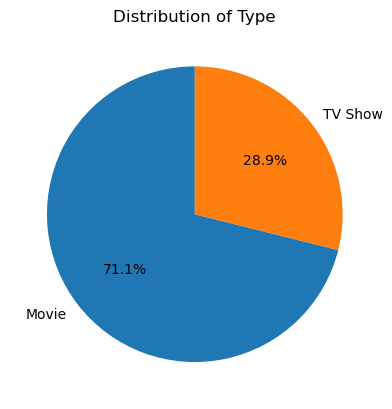

In [71]:
df['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Type')
plt.ylabel('')
plt.show()

This will show the percentage

# EDA for 'title' Column 


 Check for Duplicates

In [43]:
df['title'].duplicated().sum()

3

This will show how many duplicate titles exist.

In [47]:
df[df['title'].duplicated()]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
537,s5965,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
4260,s5966,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4261,s5967,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"


Most Frequent Titles 

In [75]:
df['title'].value_counts().head(10)

title
15-Aug                  2
22-Jul                  2
9-Feb                   2
Dick Johnson Is Dead    1
Refugee                 1
Ranbhool                1
Rangreza                1
Rats                    1
Reaction                1
Ready                   1
Name: count, dtype: int64

Text(0.5, 0, 'Count')

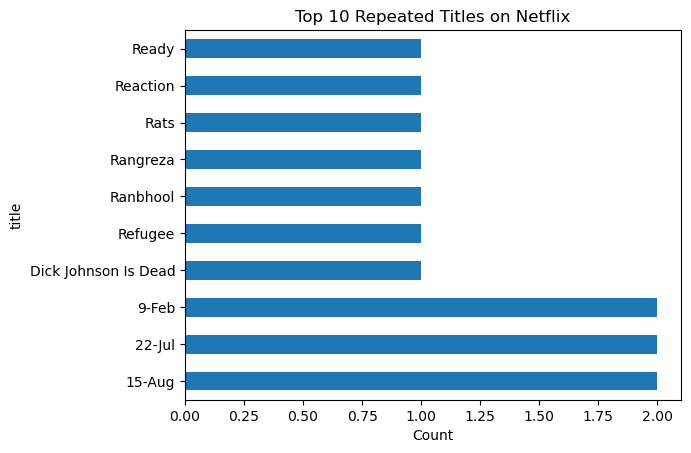

In [77]:
df['title'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Repeated Titles on Netflix")
plt.xlabel("Count")

Title Length Analysis

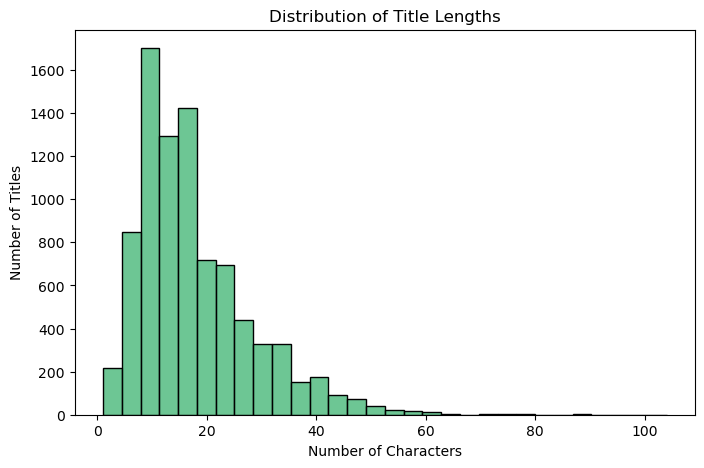

In [79]:
df['title_length'] = df['title'].str.len()

plt.figure(figsize=(8,5))
sns.histplot(df['title_length'], bins=30, color='mediumseagreen')
plt.title('Distribution of Title Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Number of Titles')
plt.show()

This tells you if Netflix prefers short titles or has many long ones.

 Top 20 Titles by Word Count

In [81]:
df['title_word_count'] = df['title'].str.split().apply(len)

df[['title', 'title_word_count']].sort_values(by='title_word_count', ascending=False).head(20)

,title,title_word_count
3725,Jim & Andy: The Great Beyond - Featuring a Ver...,17
2240,Ken Burns Presents: College Behind Bars: A Fil...,16
3509,Steve Martin and Martin Short: An Evening You ...,16
7514,The Road to El Camino: Behind the Scenes of El...,15
6254,The Power of Grayskull: The Definitive History...,15
7459,Mike Birbiglia: What I Should Have Said Was No...,15
235,Ya no estoy aquí: Una conversación entre Guill...,13
5006,Green White Green (And All the Beautiful Colou...,13
2220,Willy and the Guardians of the Lake: Tales fro...,13
4063,Gabriel lglesias: I’m Sorry For What I Said Wh...,12


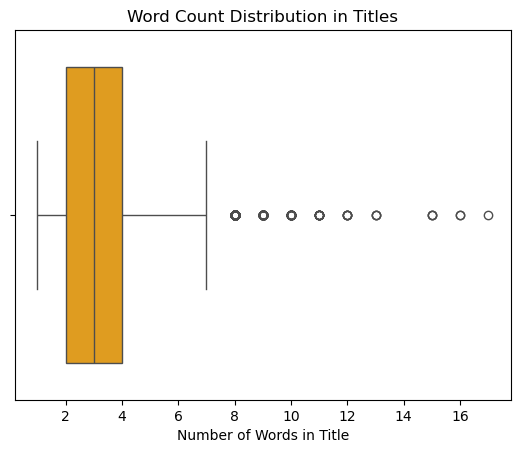

In [83]:
sns.boxplot(data=df, x='title_word_count', color='orange')
plt.title('Word Count Distribution in Titles')
plt.xlabel('Number of Words in Title')
plt.show()


 Word Cloud of Titles

In [85]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


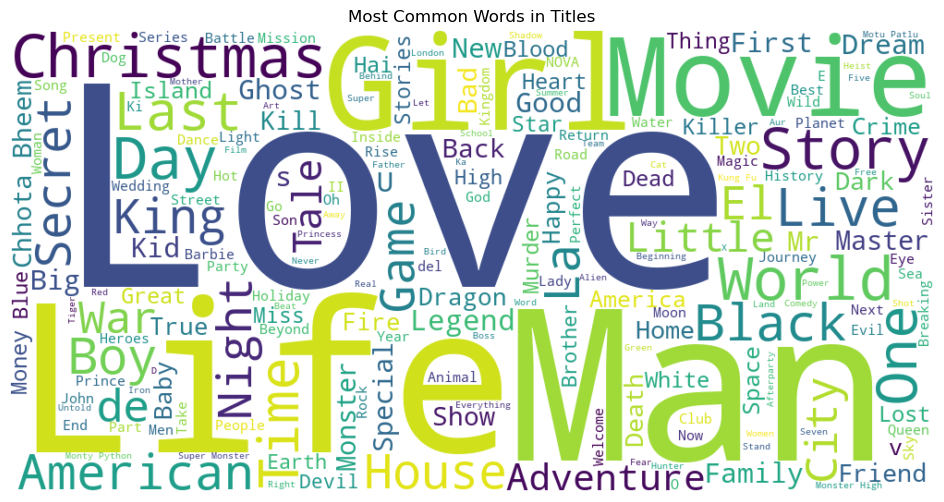

In [87]:
from wordcloud import WordCloud

text = ' '.join(df['title'].dropna())
plt.figure(figsize=(12,6))
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Titles')
plt.show()

In [91]:
df['title'].nunique()

8592

### Title Column Analysis

- There are a total of 8592 unique titles.
- The dataset contains  duplicate titles (possible remakes or same names).
- The average title length is  17.82 characters and 3.12 words.
- Most common words in titles include: "Love", "Story", "The", etc.
- Some titles seem to be date-like ("15-Aug", "22-Jul"), which may require further cleaning.
  

# EDA for director Column

 Check Number of Unique Directors

In [95]:
df['director'].nunique()

4528

Most Frequent Directors

In [108]:
df['director'].value_counts().head(15)

director
Not Given                       2393
Rajiv Chilaka                     20
Alastair Fothergill               18
Raúl Campos, Jan Suter            18
Suhas Kadav                       16
Marcus Raboy                      16
Jay Karas                         14
Cathy Garcia-Molina               13
Martin Scorsese                   12
Youssef Chahine                   12
Jay Chapman                       12
Steven Spielberg                  11
Mark Thornton, Todd Kauffman      10
Don Michael Paul                  10
David Dhawan                       9
Name: count, dtype: int64

check for how many titles with no director

In [99]:
no_director_df = df[df['director'] == 'Not Given']
print("Titles with no director info:", len(no_director_df))

Titles with no director info: 2393


check for how many titles with multiple directors

In [104]:
multi_directors = df[df['director'].str.contains(',', na=False)]
print("Titles with multiple directors:", len(multi_directors))

Titles with multiple directors: 629


# Barplot of Top 10 Directors

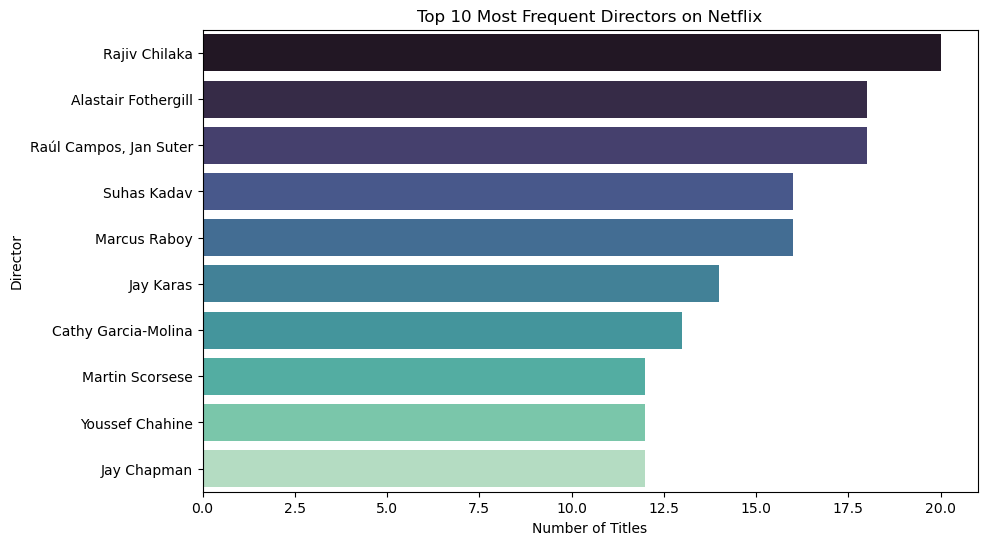

In [106]:
top_directors = df['director'].value_counts().drop('Not Given').head(15)

plt.figure(figsize=(10,6))
sns.barplot(y=top_directors.index, x=top_directors.values, palette='mako')
plt.title('Top 10 Most Frequent Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


How Many Directors Have Only 1 Title

In [110]:
one_time_directors = (df['director'].value_counts() == 1).sum()
print(f"Number of directors with only one title: {one_time_directors}")

Number of directors with only one title: 3659


This tells you if Netflix works with many one-time creators or few frequent ones.

## 🎬 Director Column Analysis

- There are a total of 4528 unique directors in the dataset.
- The most frequent director is Rajiv Chilaka, known for animated content.
- Around 2393 entries have 'Not Given' as the director name, indicating missing metadata.
- A large number of directors have only one title on Netflix.
- Above is a bar chart of the top 10 directors based on content count.

# EDA for country Column


Check for Unique Countries

In [116]:
df['country'].nunique()

85

 Top 10 Countries Producing Content

In [118]:
top_15_countries = df['country'].value_counts().head(15)
print(top_15_countries)

country
United States     3155
India             1045
United Kingdom     614
Pakistan           412
Not Given          287
Canada             263
Japan              256
France             209
South Korea        204
Spain              181
Mexico             135
Egypt              123
Australia          112
Turkey             109
Nigeria            105
Name: count, dtype: int64


bar plot of top 15 Countries Producing Netflix Content.

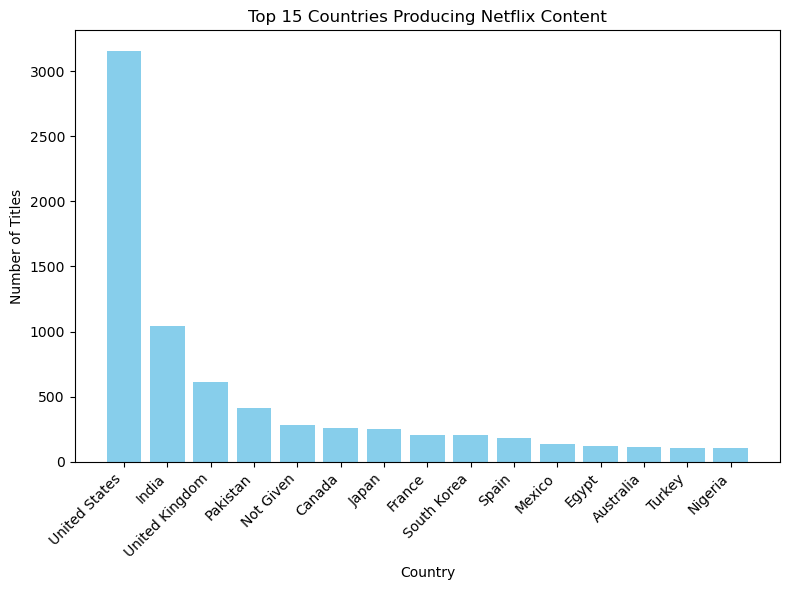

In [120]:
import matplotlib.pyplot as plt

top_10_countries = df['country'].value_counts().head(15)

plt.figure(figsize=(8, 6))
plt.bar(top_10_countries.index, top_10_countries.values, color='skyblue')
plt.title("Top 15 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Country-wise percentage distribution of Netflix Titles.

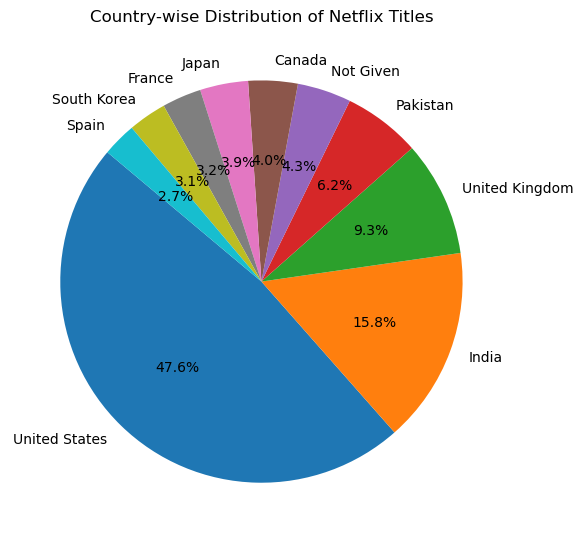

In [122]:
top_10_countries = df['country'].value_counts().head(10)
top_10_countries.plot(kind='pie',autopct='%1.1f%%', startangle=140, figsize=(6,6))
plt.title("Country-wise Distribution of Netflix Titles")
plt.ylabel("")  # Hides the y-label
plt.tight_layout()
plt.show()

Missing or 'Not Given' Countries

In [124]:
not_given = (df['country'] == 'Not Given').sum()
nan_count = df['country'].isna().sum()
print(f"'Not Given' entries: {not_given}")
print(f"NaN entries: {nan_count}")

'Not Given' entries: 287
NaN entries: 0


This helps assess data quality. You may want to treat 'Not Given' as missing.

Content Type by Country (Movies vs TV Shows)

In [132]:
type_by_country = df.groupby(['country', 'type']).size().unstack().fillna(0)
print(type_by_country)

type          Movie  TV Show
country                     
Argentina      56.0     19.0
Australia      61.0     51.0
Austria         8.0      1.0
Bangladesh      3.0      0.0
Belarus         0.0      1.0
...             ...      ...
Uruguay         8.0      1.0
Venezuela       2.0      0.0
Vietnam         7.0      0.0
West Germany    1.0      0.0
Zimbabwe        1.0      0.0

[85 rows x 2 columns]


Plot top 5 countries with stacked bars

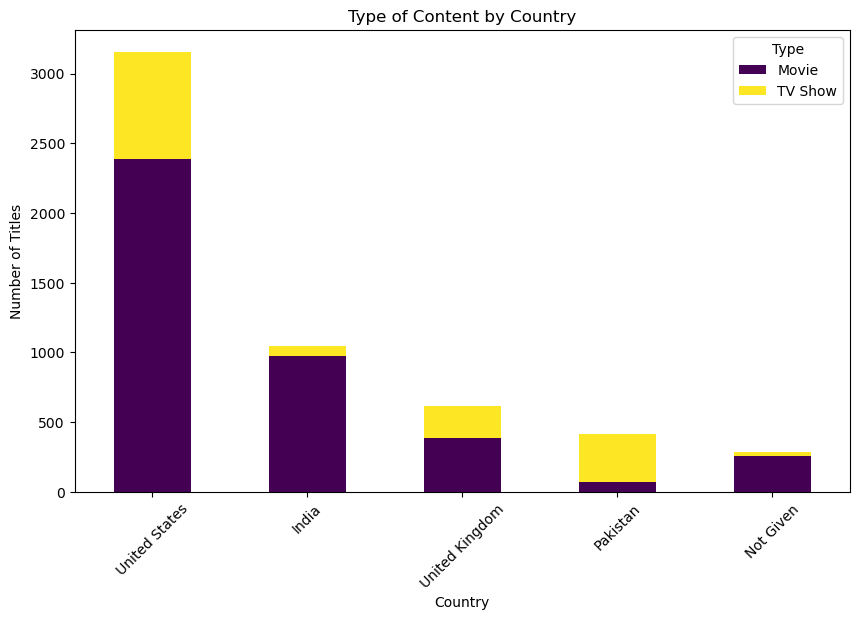

In [126]:
top5_countries = df['country'].value_counts().head(5).index
type_by_country.loc[top5_countries].plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('Type of Content by Country')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.show()

 Number of Countries with Only 1 Title

In [134]:
one_title_countries = (df['country'].value_counts() == 1).sum()
print(f"Number of countries with only one title: {one_title_countries}")

Number of countries with only one title: 18


This tells you how diverse Netflix's content is in terms of global reach.

## 🌍 Country Column Analysis

- The dataset includes content from 85 unique countries.
- The United States is the leading contributor with over 3000 titles, followed by India and the UK.
- Around 287 entries have 'Not Given' and some are missing, indicating incomplete metadata.
- Most Netflix content comes from a few top countries, but many countries have only one or two titles.
- The plot Above shows the top 10 countries and the type of content they produce (Movies vs TV Shows).
-  E(g).United States content breakdown:
Movie      2200
TV Show     955

# EDA for date_added Column


In [136]:
df['date_added']

0        9/25/2021
1        9/24/2021
2        9/24/2021
3        9/22/2021
4        9/24/2021
           ...    
8590    12/31/2015
8591      8/1/2017
8592      2/5/2018
8593     5/31/2015
8594     3/28/2018
Name: date_added, Length: 8595, dtype: object

Convert to datetime format

In [144]:
df['date_added'] = pd.to_datetime(df['date_added'])
print(df['date_added'])

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-22
4      2021-09-24
          ...    
8590   2015-12-31
8591   2017-08-01
8592   2018-02-05
8593   2015-05-31
8594   2018-03-28
Name: date_added, Length: 8595, dtype: datetime64[ns]


 Count of Titles by Year

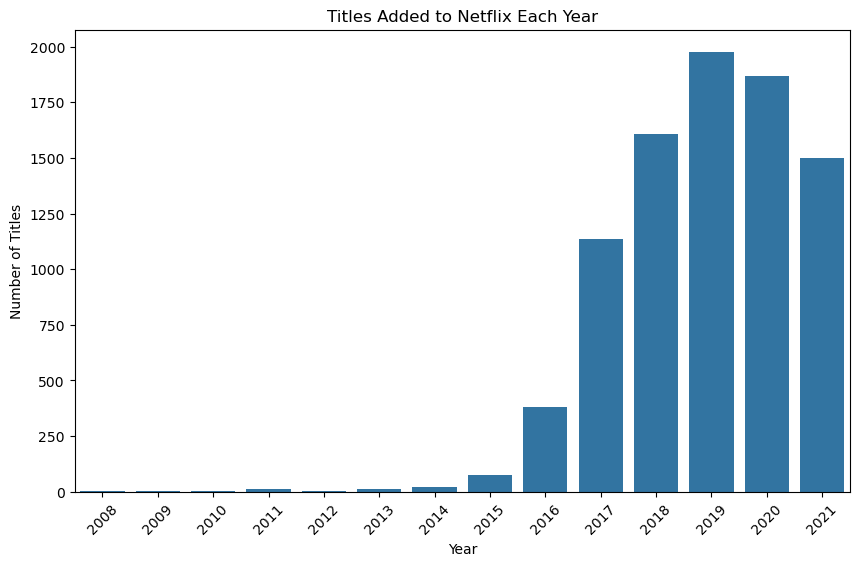

In [148]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='year_added', order=sorted(df['year_added'].dropna().unique()))
plt.title('Titles Added to Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

This tells how many shows/movies were added in 2015, 2016, 2017... etc..

 Count of Titles by Month

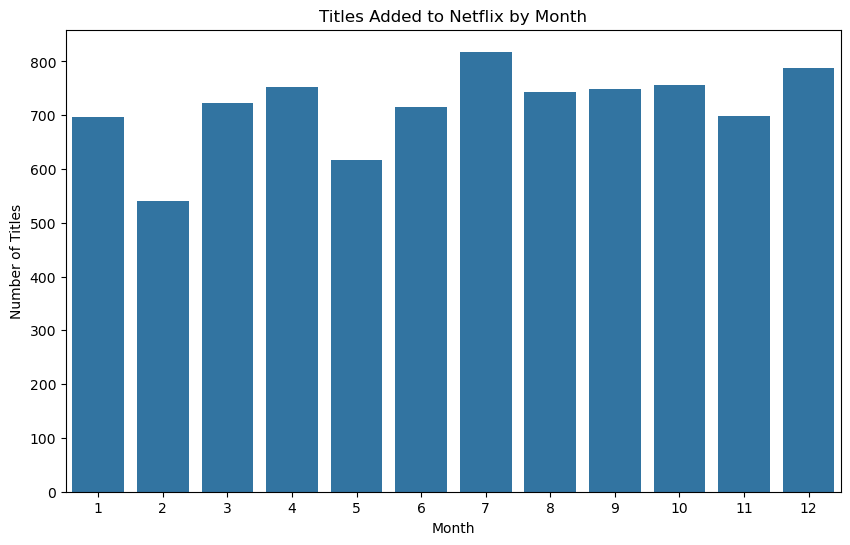

In [150]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='month_added')
plt.title('Titles Added to Netflix by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.show()

This shows in which months Netflix adds the most content. (E.g. July, December might have more releases.

 Titles Over Time (Line Chart)

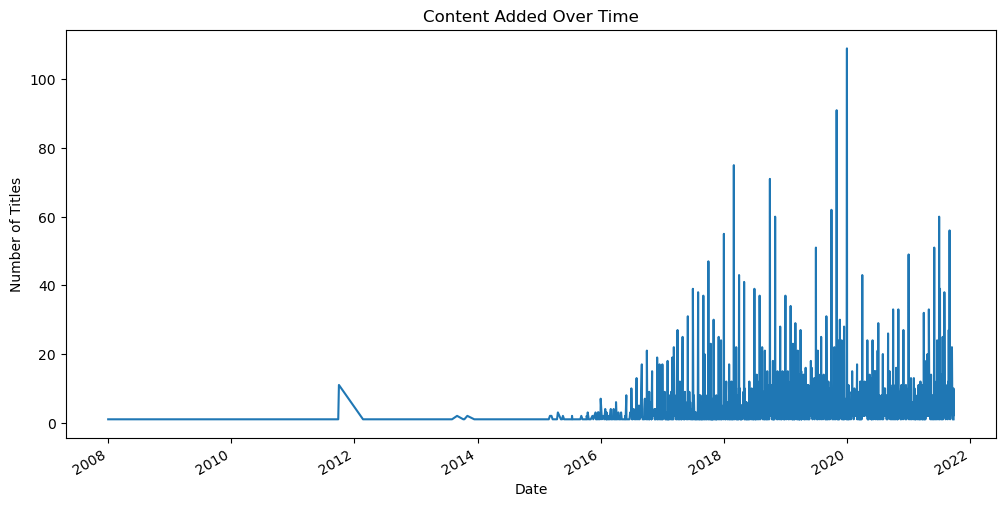

In [152]:
titles_per_date = df['date_added'].value_counts().sort_index()
titles_per_date.plot(figsize=(12,6), title="Content Added Over Time")
plt.xlabel('Date')
plt.ylabel('Number of Titles')
plt.show()

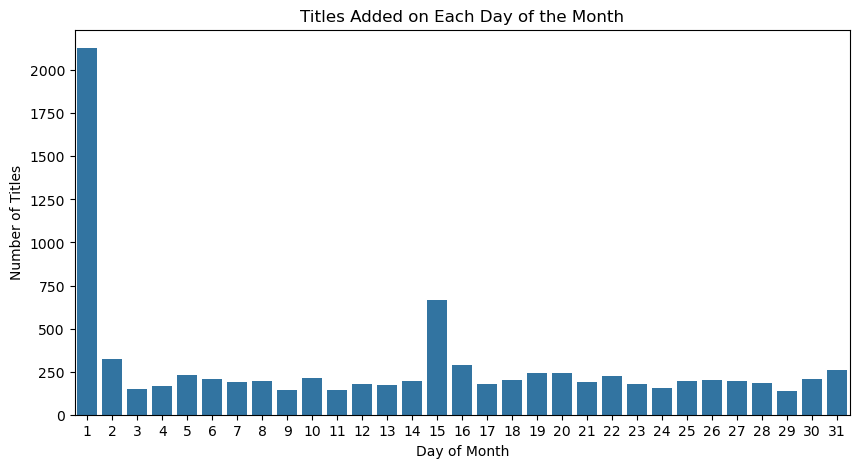

In [158]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='day_added')
plt.title('Titles Added on Each Day of the Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Titles')
plt.show()

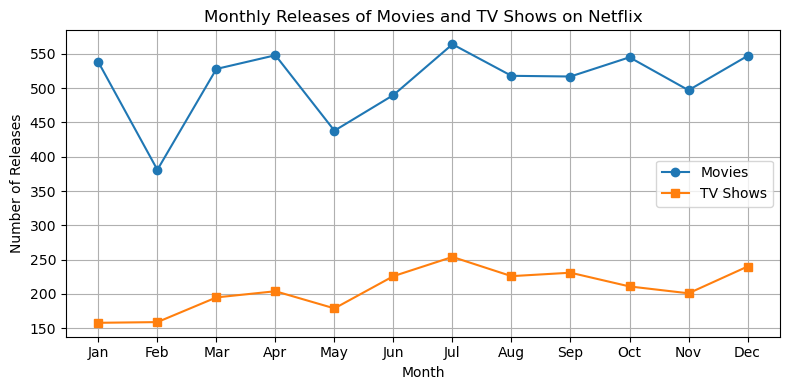

In [174]:
movie_monthly = df[df['type'] == 'Movie']['month_added'].value_counts().sort_index()
tv_monthly = df[df['type'] == 'TV Show']['month_added'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.plot(movie_monthly.index, movie_monthly.values, marker='o', label='Movies')
plt.plot(tv_monthly.index, tv_monthly.values, marker='s', label='TV Shows')

plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Monthly Releases of Movies and TV Shows on Netflix')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

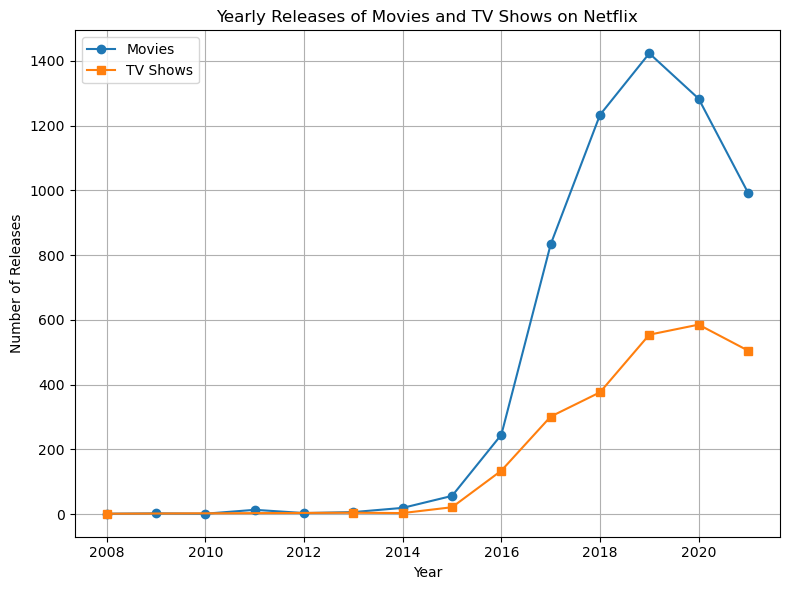

In [270]:
movie_yearly = df[df['type'] == 'Movie']['year_added'].value_counts().sort_index()
tv_yearly = df[df['type'] == 'TV Show']['year_added'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.plot(movie_yearly.index, movie_yearly.values, marker='o', label='Movies')
plt.plot(tv_yearly.index, tv_yearly.values, marker='s', label='TV Shows')

plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Yearly Releases of Movies and TV Shows on Netflix')

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# EDA for release_year

Basic stats and unique values

In [262]:
df['release_year'].value_counts().head(15)

release_year
2018    1128
2019    1027
2017    1007
2020     951
2016     870
2021     592
2015     530
2014     341
2013     278
2012     227
2010     180
2011     174
2009     144
2008     132
2006      94
Name: count, dtype: int64

In [182]:
df['release_year'].nunique()

74

In [186]:
df['release_year'].max()

2021

 Count of Titles by Release Year

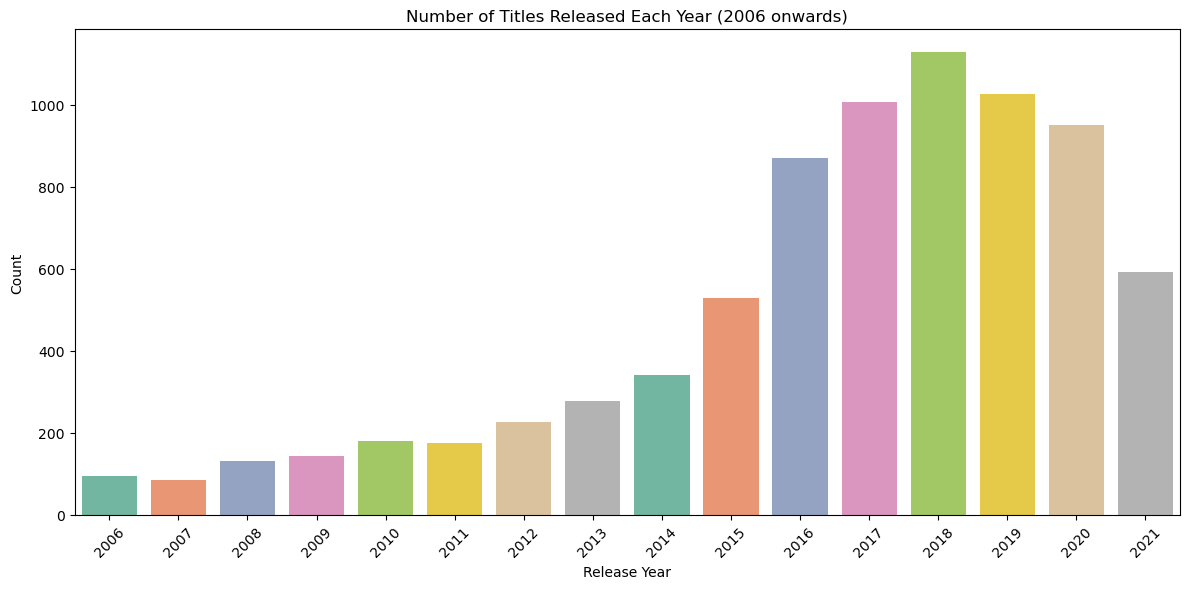

In [264]:
plt.figure(figsize=(12, 6))

# Filter data for release_year >= 2010
recent_years = df[df['release_year'] >= 2006]

# Sorted list of recent years
sorted_years = sorted(recent_years['release_year'].unique())

sns.countplot(data=recent_years, x='release_year', order=sorted_years, palette='Set2')
plt.title('Number of Titles Released Each Year (2006 onwards)')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Popular years like 2017, 2018, 2019.

 Grouped Summary (e.g., Before and After 2000)

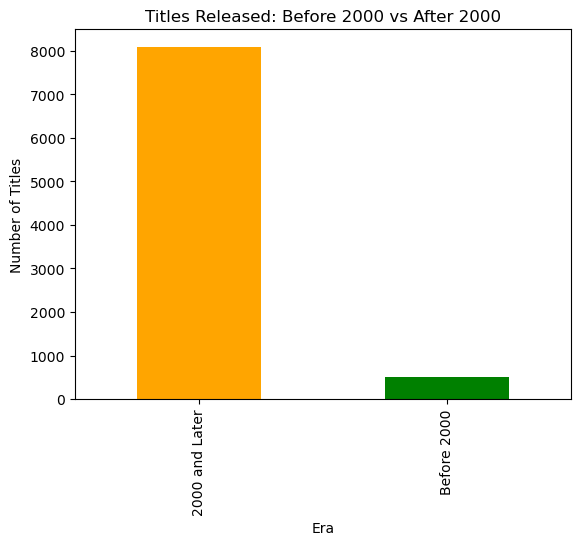

In [190]:
df['era'] = df['release_year'].apply(lambda x: 'Before 2000' if x < 2000 else '2000 and Later')
df['era'].value_counts().plot(kind='bar', color=['orange', 'green'])
plt.title('Titles Released: Before 2000 vs After 2000')
plt.xlabel('Era')
plt.ylabel('Number of Titles')
plt.show()

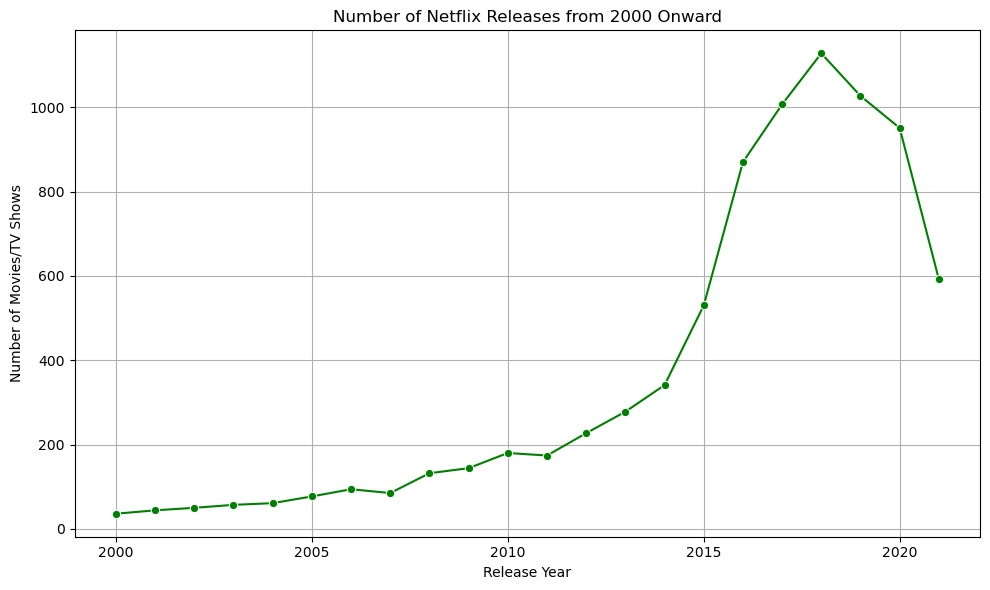

In [268]:
yearly_counts = df[df['release_year'] >= 2000]['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='green')
plt.title('Number of Netflix Releases from 2000 Onward')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/TV Shows')
plt.grid(True)
plt.tight_layout()
plt.show()

## Release Year Column Analysis

- The `release_year` column shows the original year a movie or TV show was released.
- Titles in the dataset range from **1998 to 2021**, with the majority released after 2000.
- The most common release years were 2017, 2018, and 2019.
- Very few titles were released before 2005.
- A decade-wise and era-wise analysis was done to understand content age distribution.

# EDA for rating


In [202]:
df['rating'].value_counts().head(15)

rating
TV-MA       3157
TV-14       2100
TV-PG        826
R            799
PG-13        490
TV-Y7        300
TV-Y         292
PG           287
TV-G         214
NR            77
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

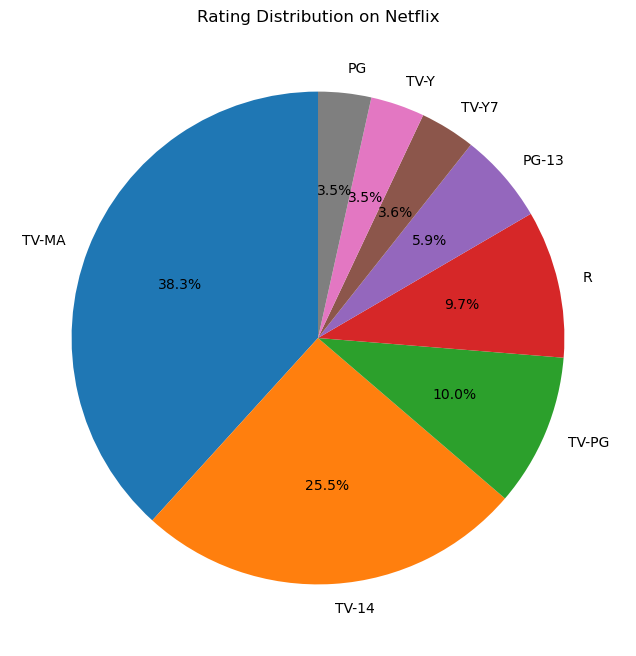

In [206]:
df['rating'].value_counts().head(8).plot.pie(autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Rating Distribution on Netflix')
plt.ylabel('')
plt.show()

 Count of titles by rating

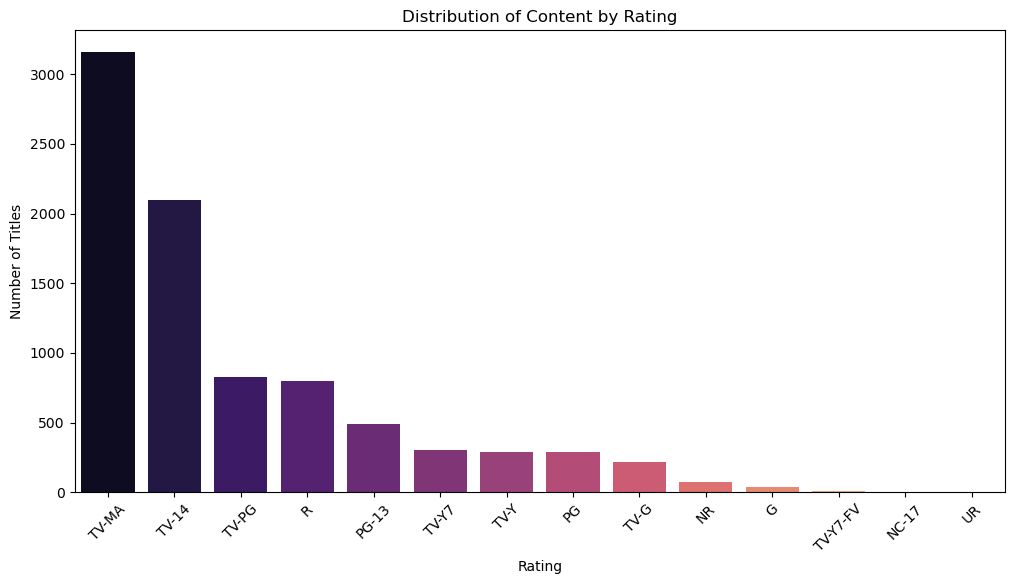

In [208]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='magma')
plt.title('Distribution of Content by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

 # Group Ratings (Optional, for simplification)
group ratings into broader age categories

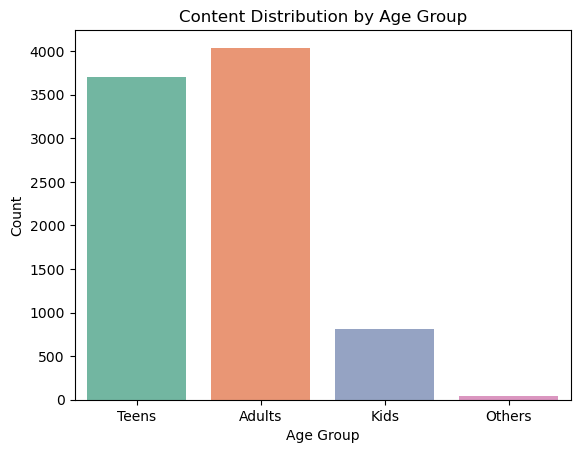

In [272]:
def simplify_rating(r):
    if r in ['TV-Y', 'TV-Y7', 'TV-G', 'TV-Y7-FV']:
        return 'Kids'
    elif r in ['PG', 'PG-13', 'TV-PG', 'TV-14']:
        return 'Teens'
    elif r in ['R', 'TV-MA', 'NC-17', 'UR', 'NR']:
        return 'Adults'
    else:
        return 'Others'

df['age_group'] = df['rating'].apply(simplify_rating)

sns.countplot(data=df, x='age_group', palette='Set2')
plt.title('Content Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

##  Rating Column Analysis

- The `rating` column describes the content rating (age suitability).
- The most frequent ratings are `TV-MA`, `TV-14`, and `TV-PG`.
- A bar chart was created to show the number of titles in each rating category.
- For simplicity, ratings were also grouped into three main age groups:
  - Kids (e.g., TV-Y, TV-G)
  - Teens (e.g., PG, TV-14)
  - Adults (e.g., TV-MA, R)
- This helps us understand the target audience of Netflix content.

# EDA for duration column

In [216]:
df['duration'].value_counts().head(20)

duration
1 Season     1668
2 Seasons     401
3 Seasons     184
90 min        152
97 min        146
93 min        146
94 min        146
91 min        144
95 min        137
96 min        130
92 min        129
102 min       122
98 min        120
99 min        118
101 min       116
88 min        116
103 min       112
106 min       111
100 min       108
89 min        105
Name: count, dtype: int64

Separate Movie Durations and TV Show Seasons

In [276]:
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

In [220]:
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

Plot Distribution for Movies

In [ ]:
Filtering movies and tv shows properly

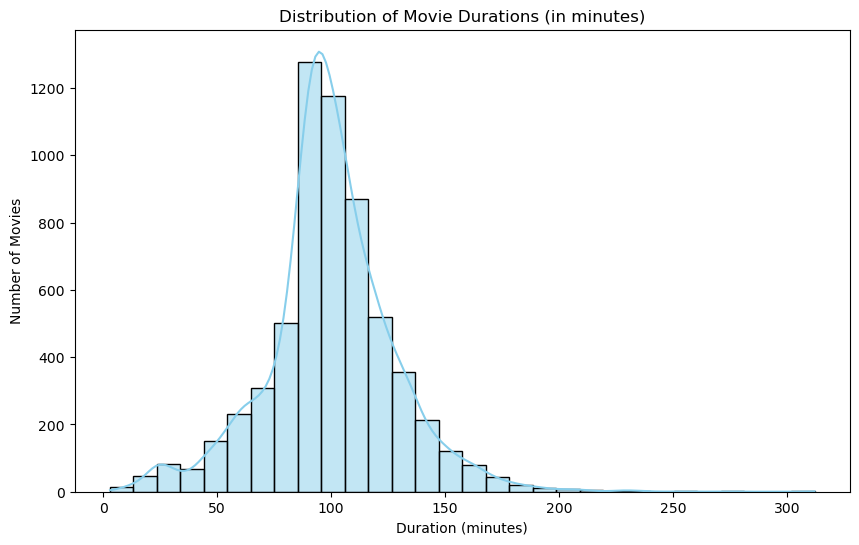

In [224]:
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()
movies['duration_int'] = movies['duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(10, 6))
sns.histplot(movies['duration_int'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

for TV Shows (Seasons):

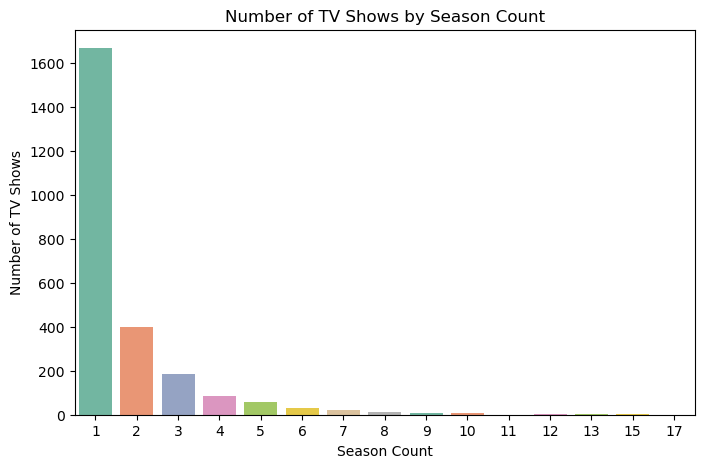

In [226]:
tv_shows['season_count'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)

plt.figure(figsize=(8, 5))
sns.countplot(data=tv_shows, x='season_count', palette='Set2')
plt.title('Number of TV Shows by Season Count')
plt.xlabel('Season Count')
plt.ylabel('Number of TV Shows')
plt.show()

Show Value Labels on Top of Histogram Bars (Movie Duration)

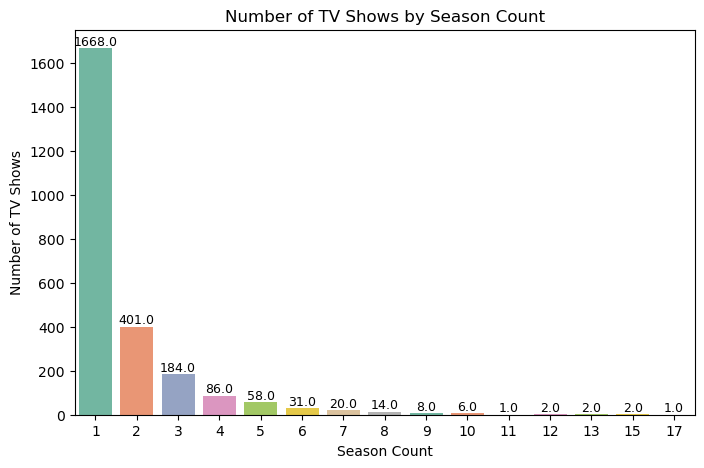

In [228]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=tv_shows, x='season_count', palette='Set2')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom', fontsize=9)

plt.title('Number of TV Shows by Season Count')
plt.xlabel('Season Count')
plt.ylabel('Number of TV Shows')
plt.show()

 Remove Outliers from Movie Duration (like above 250 minutes)

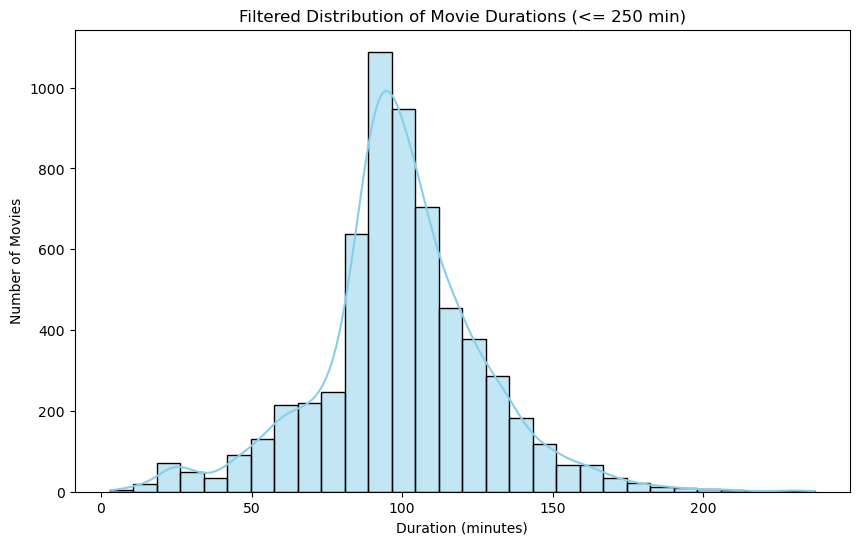

In [230]:
filtered_movies = movies[movies['duration_int'] <= 250]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_movies['duration_int'], bins=30, kde=True, color='skyblue')
plt.title('Filtered Distribution of Movie Durations (<= 250 min)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

Categorize Movie Durations (Short, Medium, Long)

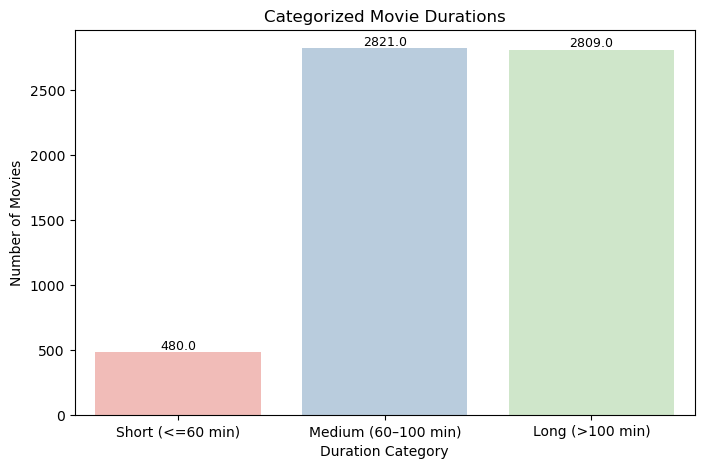

In [232]:
movies['duration_category'] = pd.cut(
    movies['duration_int'],
    bins=[0, 60, 100, 300],  # 300 to include anything long
    labels=['Short (<=60 min)', 'Medium (60–100 min)', 'Long (>100 min)']
)
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=movies, x='duration_category', palette='Pastel1')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom', fontsize=9)

plt.title('Categorized Movie Durations')
plt.xlabel('Duration Category')
plt.ylabel('Number of Movies')
plt.show()

# EDA for listed_in

In [234]:
df['listed_in'].value_counts()

listed_in
Dramas, International Movies                              361
Documentaries                                             358
Stand-Up Comedy                                           334
Comedies, Dramas, International Movies                    273
Dramas, Independent Movies, International Movies          252
                                                         ... 
Anime Features, Romantic Movies                             1
Anime Features, International Movies, Sci-Fi & Fantasy      1
TV Action & Adventure, TV Dramas, Teen TV Shows             1
LGBTQ Movies, Thrillers                                     1
Classic & Cult TV, TV Horror, TV Mysteries                  1
Name: count, Length: 509, dtype: int64

We need to split the Combined genre and count them individually.

Create a list of all genres

In [236]:
all_genres = df['listed_in'].dropna().str.split(', ')
print(all_genres)

0                                         [Documentaries]
1       [Crime TV Shows, International TV Shows, TV Ac...
2                    [TV Dramas, TV Horror, TV Mysteries]
3                    [Children & Family Movies, Comedies]
4       [Dramas, Independent Movies, International Mov...
                              ...                        
8590                             [TV Comedies, TV Dramas]
8591       [British TV Shows, Crime TV Shows, Docuseries]
8592    [Crime TV Shows, International TV Shows, TV Dr...
8593    [Kids' TV, TV Action & Adventure, TV Sci-Fi & ...
8594                                           [Kids' TV]
Name: listed_in, Length: 8595, dtype: object


Flatten the list and count

In [238]:
from collections import Counter
genre_counter = Counter([genre for sublist in all_genres for genre in sublist])
print(genre_counter)

Counter({'International Movies': 2746, 'Dramas': 2422, 'Comedies': 1673, 'International TV Shows': 1285, 'Documentaries': 866, 'Action & Adventure': 856, 'Independent Movies': 755, 'TV Dramas': 721, 'Children & Family Movies': 637, 'Romantic Movies': 616, 'Thrillers': 577, 'TV Comedies': 545, 'Crime TV Shows': 446, "Kids' TV": 403, 'Music & Musicals': 374, 'Horror Movies': 357, 'Docuseries': 356, 'Romantic TV Shows': 348, 'Stand-Up Comedy': 343, 'Sci-Fi & Fantasy': 242, 'Reality TV': 239, 'British TV Shows': 230, 'Sports Movies': 218, 'Anime Series': 169, 'TV Action & Adventure': 162, 'Spanish-Language TV Shows': 162, 'Korean TV Shows': 140, 'Classic Movies': 116, 'LGBTQ Movies': 102, 'TV Mysteries': 94, 'Science & Nature TV': 81, 'TV Sci-Fi & Fantasy': 80, 'TV Horror': 72, 'Anime Features': 71, 'Cult Movies': 71, 'Teen TV Shows': 67, 'Faith & Spirituality': 65, 'Stand-Up Comedy & Talk Shows': 55, 'TV Thrillers': 54, 'Movies': 50, 'Classic & Cult TV': 22, 'TV Shows': 15})


Convert to DataFrame

In [240]:
genre_df = pd.DataFrame(genre_counter.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
print(genre_df)

                           Genre  Count
11          International Movies   2746
9                         Dramas   2422
8                       Comedies   1673
2         International TV Shows   1285
0                  Documentaries    866
28            Action & Adventure    856
10            Independent Movies    755
4                      TV Dramas    721
7       Children & Family Movies    637
18               Romantic Movies    616
21                     Thrillers    577
23                   TV Comedies    545
1                 Crime TV Shows    446
17                      Kids' TV    403
14              Music & Musicals    374
19                 Horror Movies    357
16                    Docuseries    356
27             Romantic TV Shows    348
36               Stand-Up Comedy    343
20              Sci-Fi & Fantasy    242
13                    Reality TV    239
12              British TV Shows    230
33                 Sports Movies    218
25                  Anime Series    169


Plot Top Genres

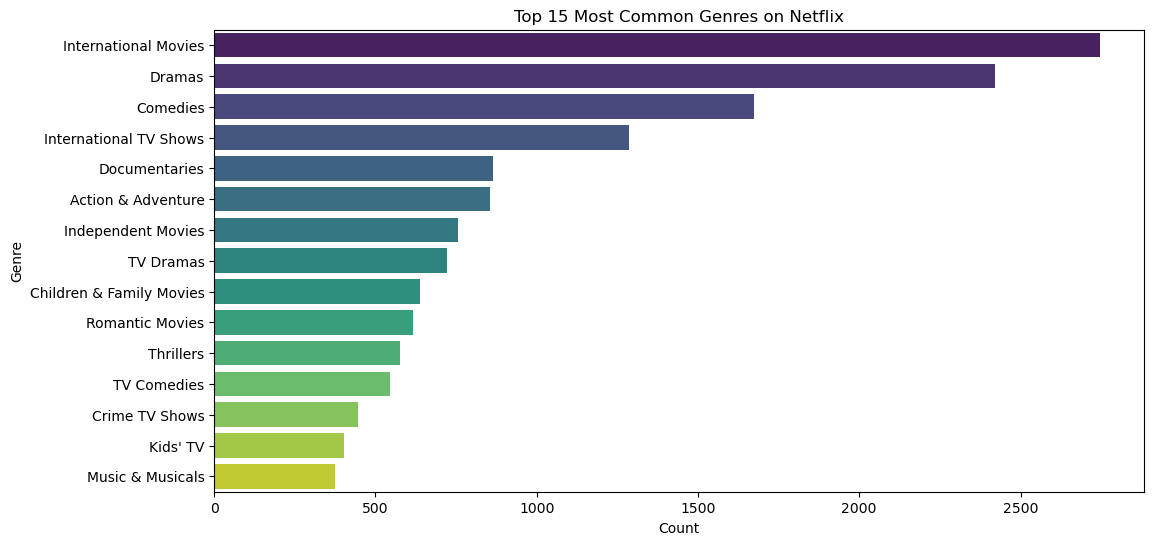

In [242]:
plt.figure(figsize=(12,6))
sns.barplot(data=genre_df.head(15), x='Count', y='Genre', palette='viridis')
plt.title('Top 15 Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

This shows which genres dominate on Netflix (like Dramas, Comedies, Documentaries, etc.)

Compare Genres by Type (Which genres are more popular in Movies vs TV Shows)

# Create separate rows for each genre

In [246]:
df_exploded = df.copy()

In [248]:
df_exploded['genre_split'] = df_exploded['listed_in'].str.split(', ')
df_exploded = df_exploded.explode('genre_split')
df_exploded.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'title_length',
       'title_word_count', 'year_added', 'month_added', 'day_added',
       'dayofweek_added', 'is_weekend', 'days_since_added', 'era', 'age_group',
       'genre_split'],
      dtype='object')

In [250]:
df_exploded['genre_split'].value_counts()

genre_split
International Movies            2746
Dramas                          2422
Comedies                        1673
International TV Shows          1285
Documentaries                    866
Action & Adventure               856
Independent Movies               755
TV Dramas                        721
Children & Family Movies         637
Romantic Movies                  616
Thrillers                        577
TV Comedies                      545
Crime TV Shows                   446
Kids' TV                         403
Music & Musicals                 374
Horror Movies                    357
Docuseries                       356
Romantic TV Shows                348
Stand-Up Comedy                  343
Sci-Fi & Fantasy                 242
Reality TV                       239
British TV Shows                 230
Sports Movies                    218
Anime Series                     169
TV Action & Adventure            162
Spanish-Language TV Shows        162
Korean TV Shows           

 Plot genre distribution by type

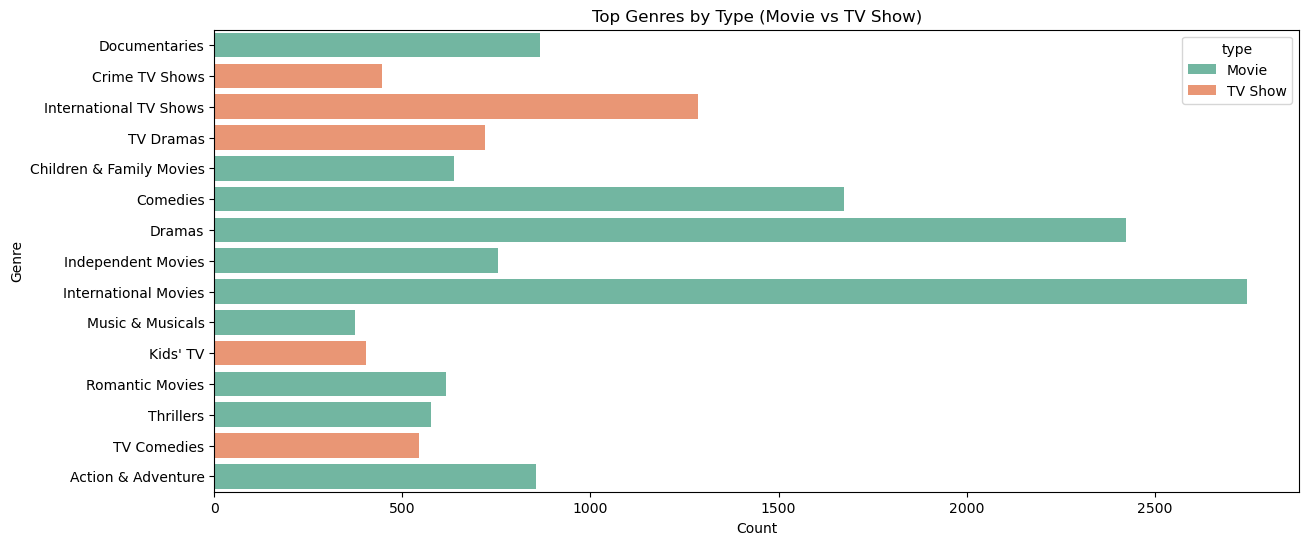

In [252]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_exploded[df_exploded['genre_split'].isin(genre_df['Genre'].head(15))],
              y='genre_split', hue='type', palette='Set2')
plt.title('Top Genres by Type (Movie vs TV Show)')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Conclusion

The Netflix data analysis project provided deep insights into the platform’s content trends, distribution, and characteristics. Below are the key conclusions drawn from the analysis:

Content Type: The dataset consists of more Movies than TV Shows, highlighting that Netflix has historically prioritized film content.

Release Trends: Most content on Netflix was released after 2010, with a peak in new releases around 2017–2020, indicating rapid growth during that period.

Duration Distribution: Movie durations are generally between 80 to 120 minutes, while TV Shows typically consist of 1–2 seasons.

Country Insights: The United States dominates Netflix’s content production, followed by India and the United Kingdom. However, Netflix also includes diverse content from over 80+ countries.

Genres: The platform is rich in Drama, Documentaries, Comedies, and International content. These are the most common genres, reflecting global viewer preferences.

Ratings: The majority of content is rated TV-MA and TV-14, indicating a focus on content suitable for teens and adults.

Director & Title Analysis: A large portion of content has missing or “Not Given” director information. Most titles are unique, but a few appear multiple times.

Seasonal & Date Trends: The highest number of shows were added during January and December, possibly due to content releases around holidays.

Movie vs TV Show Split per Country: Countries like the US and India contribute to both Movies and TV Shows, but Movies remain the dominant format.

This project helped enhance skills in data cleaning, EDA, and visualization using Python libraries like Pandas, Matplotlib, and Seaborn. The analysis can be extended in future with machine learning models to recommend shows or predict content popularity.